<a href="https://colab.research.google.com/github/kairamilanifitria/Bootcamp-NLP/blob/main/23092024_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latency Time

In [1]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.00GHz
    CPU family:           6
    Model:                85
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             3
    BogoMIPS:             4000.33
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

In [4]:
!nvidia-smi

Mon Sep 23 14:45:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0              28W /  70W |    541MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import torch
import time
import torchvision.models as models

# Define the model
model = models.resnet50(pretrained=True)

# Set the model to evaluation mode
model.eval()

# Define a sample input tensor to warm up the computation
input_tensor = torch.rand(1, 3, 224, 224)

# Warm up the computation for GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)
    input_tensor = input_tensor.to(device)
    for i in range(10):
        output = model(input_tensor)

# Test inference time for GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)
    input_tensor = input_tensor.to(device)
    for i in range(100):
        start_time = time.time()
        output = model(input_tensor)
    end_time = time.time()
    print(f"Inference time for GPU: {end_time - start_time:.4f} seconds")

# Test inference time for CPU
device = torch.device("cpu")
model.to(device)
input_tensor = input_tensor.to(device)
for i in range(100):
    start_time = time.time()
    output = model(input_tensor)
end_time = time.time()
print(f"Inference time for CPU: {end_time - start_time:.4f} seconds")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 183MB/s]


Inference time for GPU: 0.0239 seconds
Inference time for CPU: 0.1338 seconds


In [5]:
input_tensor

tensor([[[[0.6563, 0.7383, 0.4645,  ..., 0.0640, 0.2046, 0.1616],
          [0.0746, 0.1161, 0.1582,  ..., 0.1444, 0.0111, 0.9182],
          [0.5910, 0.7765, 0.2558,  ..., 0.7893, 0.9544, 0.0745],
          ...,
          [0.0222, 0.8767, 0.8610,  ..., 0.3823, 0.0159, 0.9443],
          [0.8717, 0.6503, 0.1686,  ..., 0.3894, 0.2990, 0.8027],
          [0.8060, 0.8436, 0.3998,  ..., 0.9698, 0.5993, 0.2351]],

         [[0.0526, 0.9365, 0.6760,  ..., 0.5431, 0.8235, 0.7591],
          [0.2142, 0.7610, 0.0147,  ..., 0.0465, 0.3117, 0.6245],
          [0.1434, 0.2831, 0.8838,  ..., 0.8413, 0.6760, 0.4295],
          ...,
          [0.4351, 0.1942, 0.4398,  ..., 0.7810, 0.6266, 0.8045],
          [0.0951, 0.4175, 0.7148,  ..., 0.6678, 0.5729, 0.1099],
          [0.9174, 0.4770, 0.1186,  ..., 0.9370, 0.9699, 0.3729]],

         [[0.3338, 0.2922, 0.9428,  ..., 0.7494, 0.7255, 0.3000],
          [0.9911, 0.6095, 0.6562,  ..., 0.7507, 0.9997, 0.1848],
          [0.7965, 0.5699, 0.0651,  ..., 0

In [6]:
input_tensor.shape

torch.Size([1, 3, 224, 224])

# Confusion Matrix

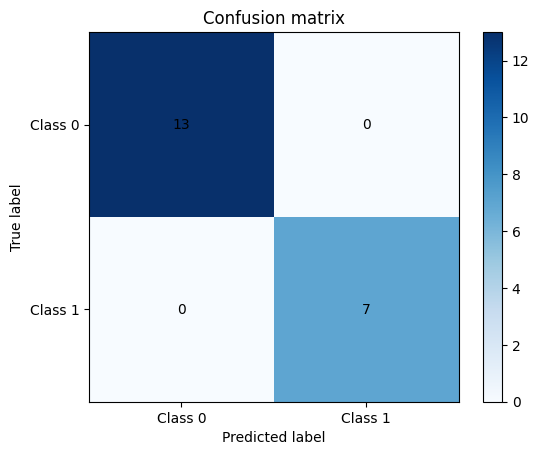

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate dummy data for a binary classification problem
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add labels to the plot
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center')

plt.show()